In [1]:
# Generic imports
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

# Local imports
import sys
sys.path.append('../../../..')
import fourierstuff as fs

In [2]:
%matplotlib notebook

The next cell has parameters that might change from crystal to crystal

In [3]:
# Loading in the compressed data
Segmentname = 'Segments1'
Flattenedfilename = Segmentname+'_compr_flat_filt.npz'; print(Flattenedfilename)

Segments1_compr_flat_filt.npz


In [4]:
# Derivative names
flattenedfile = np.load(Flattenedfilename); print(Flattenedfilename)
xgridtot = flattenedfile['xgridtot']
ygridtot = flattenedfile['ygridtot']
zgridtot = flattenedfile['zgridtot']
nsegments = (len(zgridtot)); print(nsegments)

Segments1_compr_flat_filt.npz
1


sollast:  (55, 36)
(53, 34)
Z mean  0.04019147014324129
Z std dev  0.42663505959692466
ny,nx  55 36
Size before paring  109 71
Size after paring  54 34
(54, 34)
(54, 34)
(54, 34)

****Working on segment 0


<IPython.core.display.Javascript object>


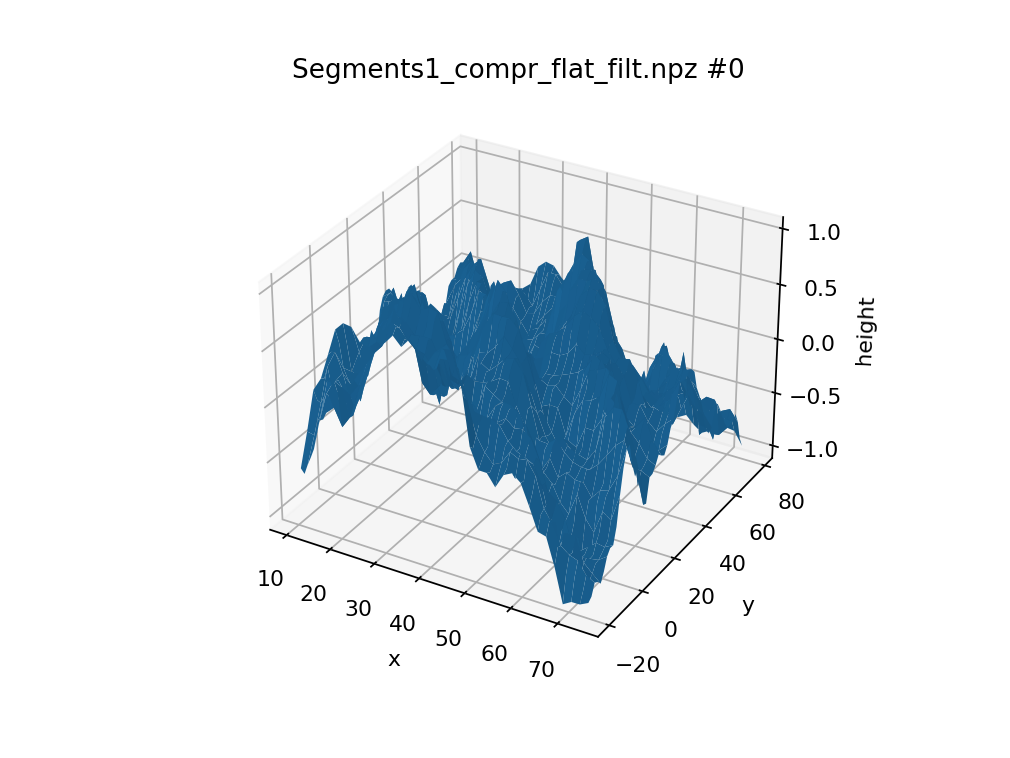

<IPython.core.display.Javascript object>


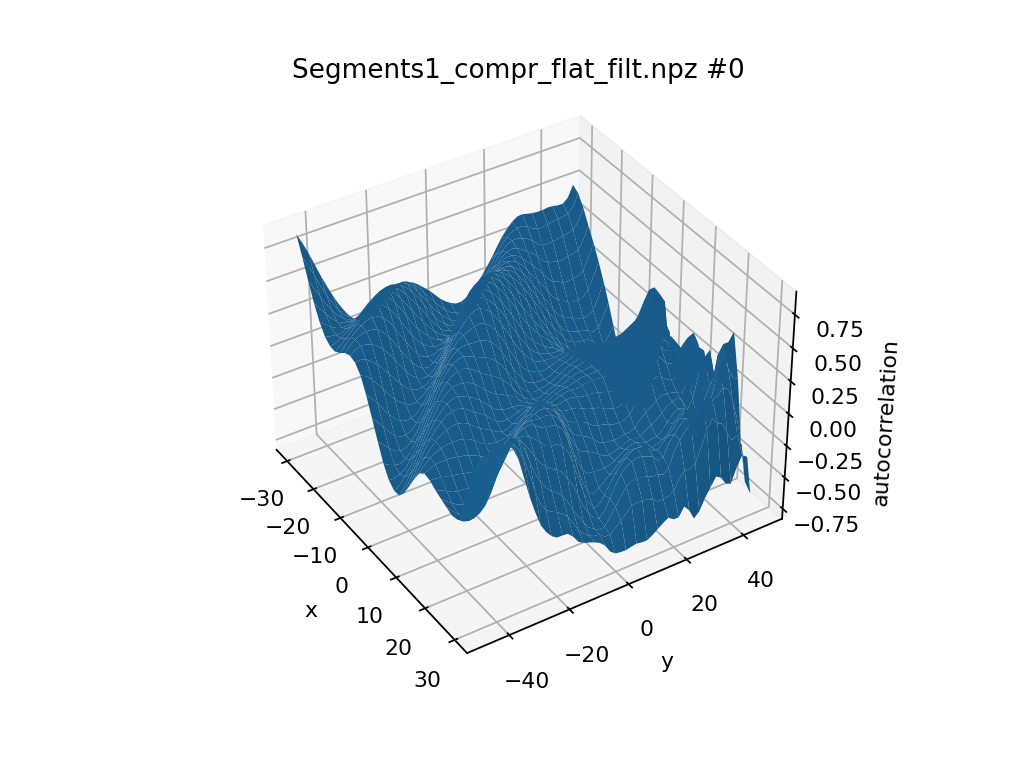

<IPython.core.display.Javascript object>


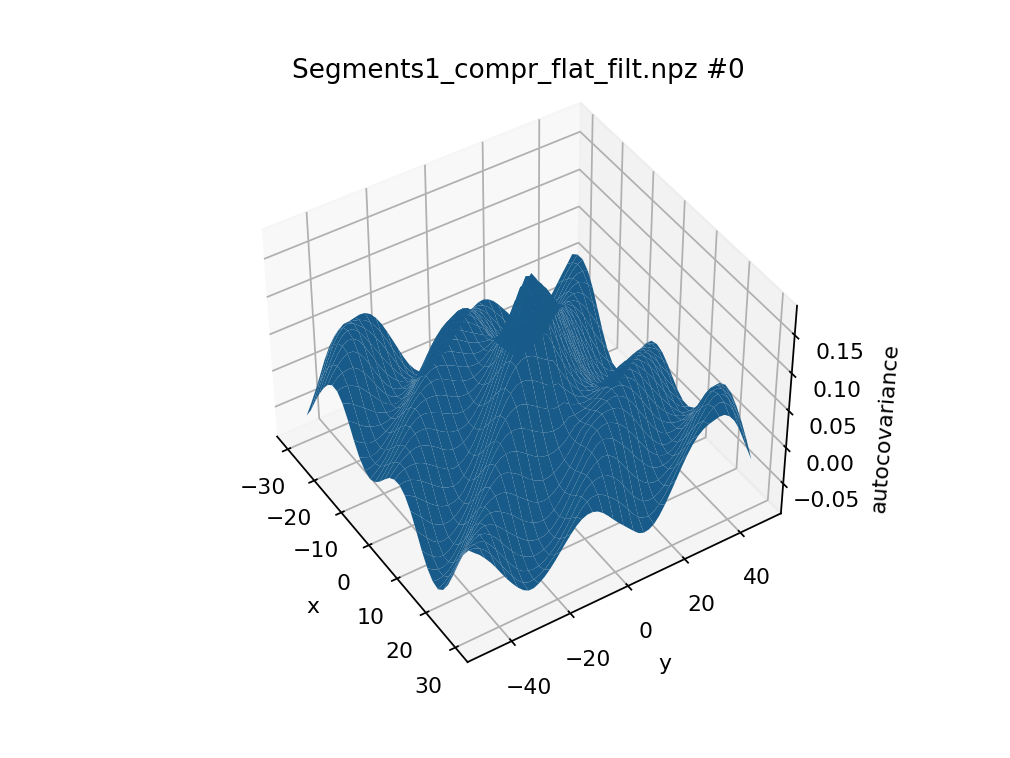

In [5]:
# For plotting (this is kind of overkill)
plotthisone = [i for i in range(nsegments)]

# Looping over segments
for isegment in range(nsegments):

    # Pull out the next segment
    sollast = zgridtot[isegment]
    print('sollast: ', np.shape(sollast))
    xgrid = xgridtot[isegment]; 
    ygrid = ygridtot[isegment]; 

    # Get the autocorrelation
    xgrid_ACF, ygrid_ACF, ACF = fs.autocorrelate(xgrid,ygrid,sollast)
    print(np.shape(ACF))

    # Get the autocovariance
    xgrid_ACVF, ygrid_ACVF, ACVF = fs.autocovariance(xgrid,ygrid,sollast,debug=False)
    print(np.shape(ACVF))
    print(np.shape(ygrid_ACVF))
    print(np.shape(xgrid_ACVF))

    # Plot if we want
    if isegment in plotthisone:
        
        # Reporting
        print('')
        print('****Working on segment', isegment)
        
        # Graph the result
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid, ygrid, sollast)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('height')
        ax.set_title(title)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid_ACF, ygrid_ACF, ACF)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('autocorrelation')
        ax.set_title(title)

        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
        ax.plot_surface(xgrid_ACVF, ygrid_ACVF, ACVF)
        title = Flattenedfilename+' #'+str(isegment)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('autocovariance')
        ax.set_title(title)
 